# Barber pole chart

I had an idea that came to me while taking a nap to show the roll angle (attitude) of a vehicle over time in a 2D chart.

In [11]:
# standard setup
from math import sin, degrees, radians
import matplotlib.pyplot as plt
%matplotlib inline

# Time span is the same for all examples
time = [i/100.0 for i in range(1000)]

# Build a standard way to plot
def plot_standard(data, title):
    fig, ax1 = plt.subplots(figsize=(20,8))
    plt.title(title)
    plt.ylabel(r"Roll Angle [${}^0$]")
    plt.xlabel(r"Time [s]")

    plt.plot(time, roll_angle)

    plt.show()

# Build a Barber Pole plot
def plot_barber_pole(data, title):
    roll_front = []
    roll_back = []
    turns = 0
    for theta in data:
        theta = theta - (turns*360)
        if theta > 360.0:
            turns += 1
        barber = sin(radians(theta))
        if theta > 90 and theta < 270:
            roll_front.append(None)
            roll_back.append(barber)
        else:
            roll_front.append(barber)
            roll_back.append(None)

    fig, ax1 = plt.subplots(figsize=(20,8))
    plt.title(title)
    plt.ylabel(r"Spin")
    plt.xlabel(r"Time [s]")

    plt.plot(time, roll_front, 'r-', alpha=0.8)
    plt.plot(time, roll_back, 'r--', alpha=0.3)

    plt.ylim([-1.1,1.1])
    plt.show()

## Standing Still

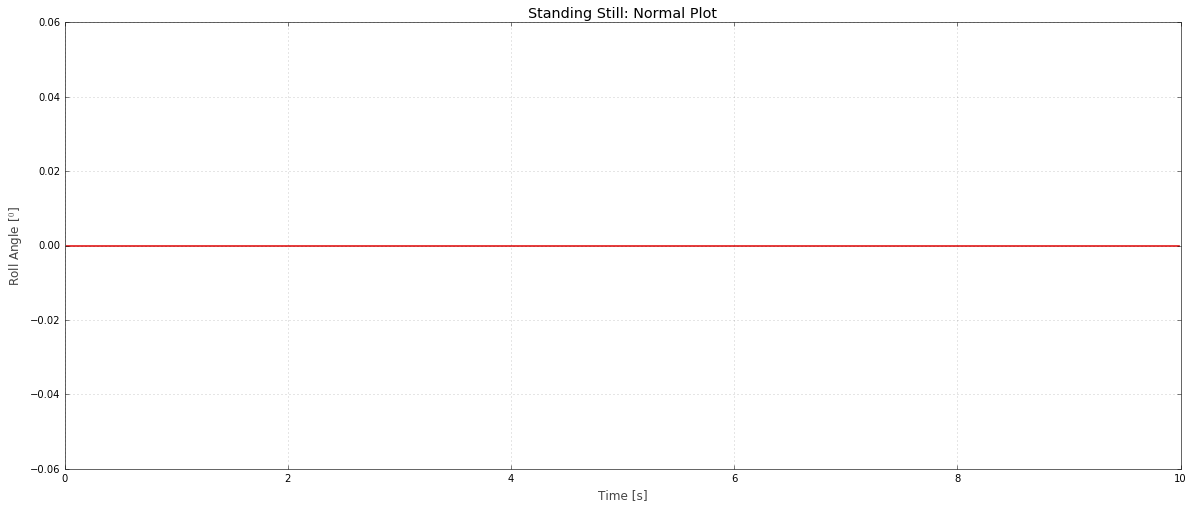

In [12]:
# Generate data
roll_angle = [0 for i in range(1000)]

plot_standard(roll_angle, "Standing Still: Normal Plot")

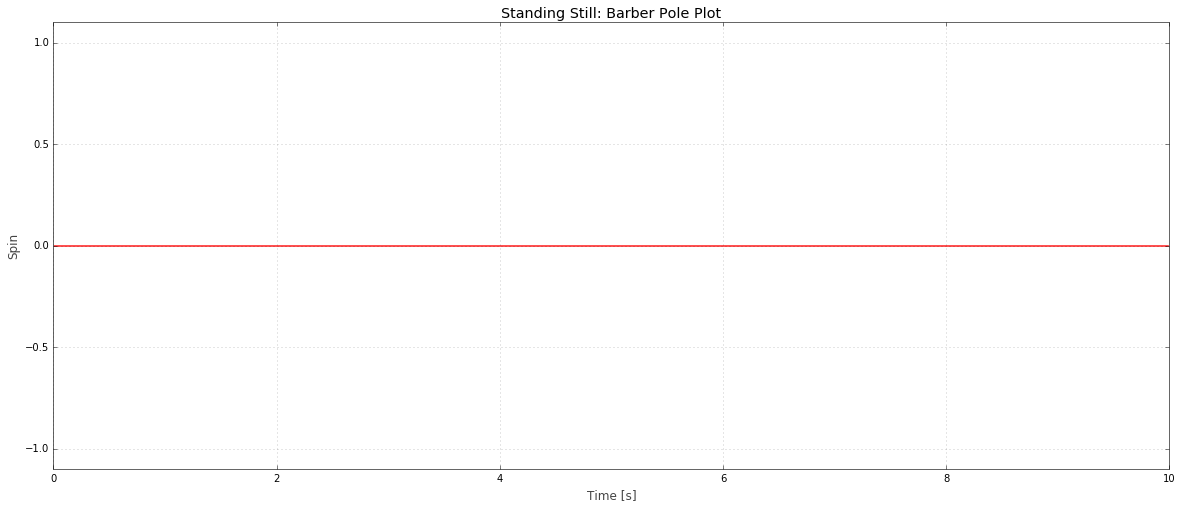

In [13]:
plot_barber_pole(roll_angle, "Standing Still: Barber Pole Plot")

## Constant Roll Rate

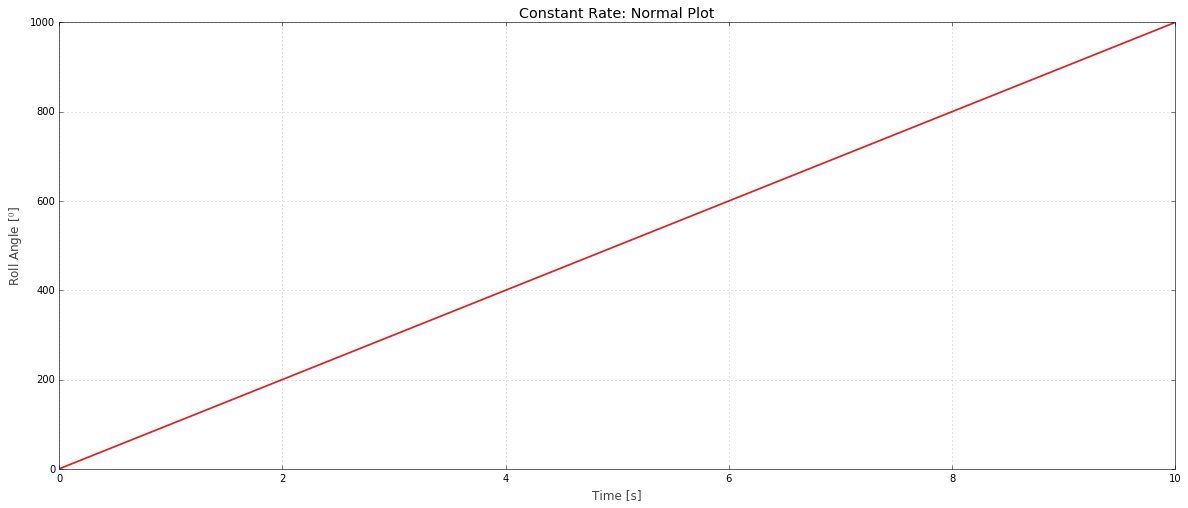

In [14]:
# Generate data, monotonically increasing roll angle (fixed roll rate)
roll_angle = [i for i in range(1000)]

plot_standard(roll_angle, "Constant Rate: Normal Plot")

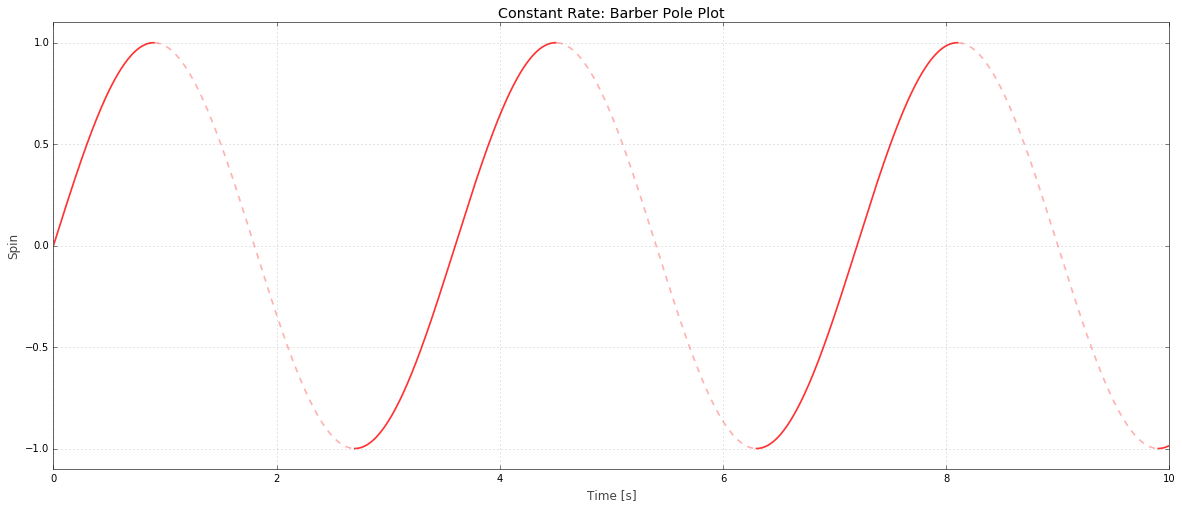

In [15]:
plot_barber_pole(roll_angle, "Constant Rate: Barber Pole Plot")

## Accelerating Roll Rate

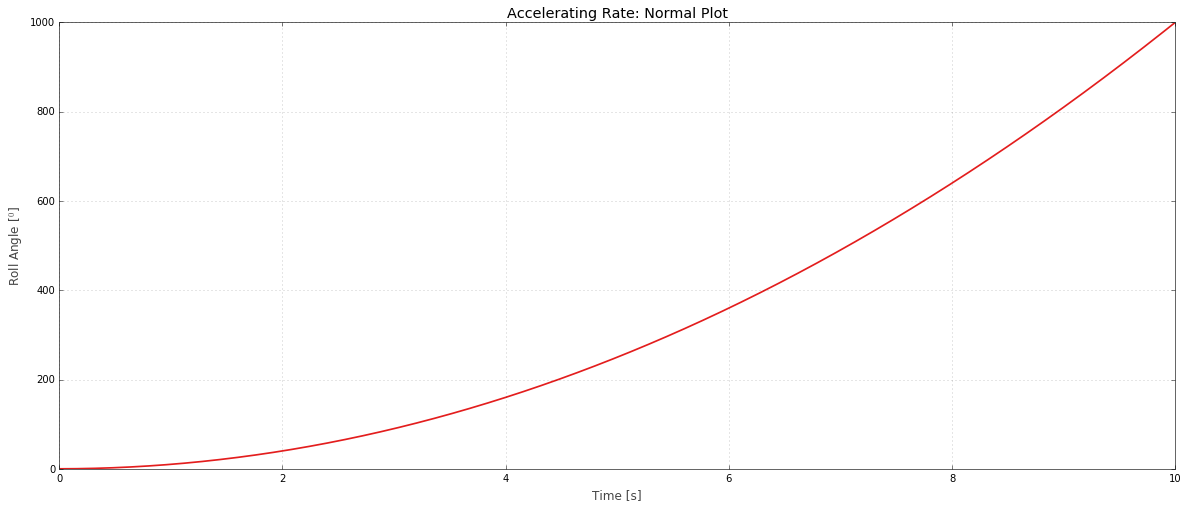

In [22]:
# Generate data, monotonically increasing roll angle (fixed roll rate)
roll_angle = [i*(i*0.001) for i in range(1000)]

plot_standard(roll_angle, "Accelerating Rate: Normal Plot")

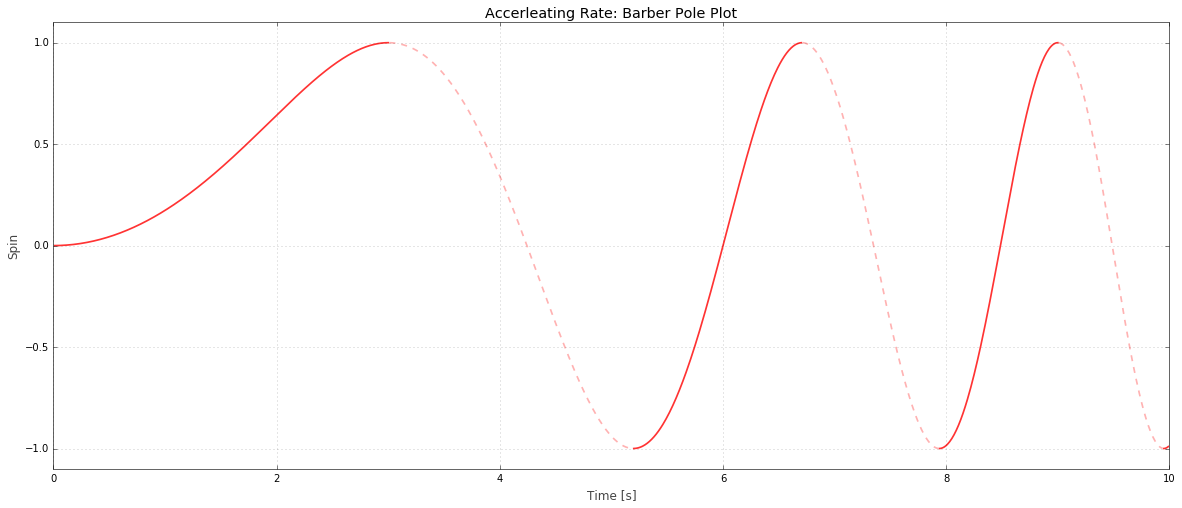

In [23]:
plot_barber_pole(roll_angle, "Accerleating Rate: Barber Pole Plot")